* DSC530: Week 4
* 4.2 Exercise
* Marty Hoehler
* 4-7-24

# Exercise 3-1

First, we'll use code from previous weeks to import the data.  

In [1]:
import numpy as np

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [2]:
import nsfg
resp = nsfg.ReadFemResp()

Next, we'll do some exploration of the "numkdhh" value to understand it a bit better.

In [3]:
resp.numkdhh.value_counts().sort_index()

0    3563
1    1636
2    1500
3     666
4     196
5      82
Name: numkdhh, dtype: int64

From these numbers, we can see where bias would set in if we interviewed a random number of children.  The 3563 families that have 0 children would never be sampled.  We'll use the thinkplot functions from the text to create the pmf of these values.


In [4]:
import thinkstats2
actual_pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')
print('actual mean', actual_pmf.Mean())

actual mean 1.024205155043831


Next, we'll use the method in the text to create a biased histogram that simulates what we would see if we surveyed children and asked them the number of children in their family.  This "BiasPMF()" function, taken from the text, will create the biased pmf.

In [5]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Now that we have the function, we'll use it to create the biased pmf and find the mean.

In [6]:
biased_pmf = BiasPmf(actual_pmf, label = 'observed')
print('biased mean', biased_pmf.Mean())

biased mean 2.403679100664282


We can see that the biased mean is much higher than the actual mean.

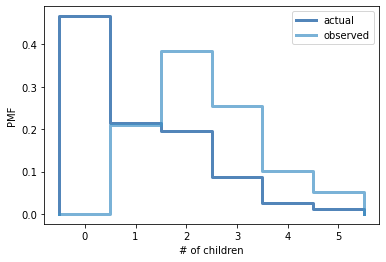

<Figure size 576x432 with 0 Axes>

In [7]:
import thinkplot

thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_pmf, biased_pmf])
thinkplot.Show(xlabel='# of children',ylabel='PMF')

As expected, the 'observed' line has no responses from families with 0 children.

# Exercise 3-2

Creating functions for mean and variance - 
 - I used this site for help with the loop in the code:
-  https://stackoverflow.com/questions/49998584/how-to-use-a-for-loop-to-calculate-mean-of-list-of-numbers-python

In [8]:
def PmfMean(pmf):
    total = 0
    for x, p in pmf.Items():
        total = total + (p * x)                    
    return total

In [9]:
PmfMean(actual_pmf)

1.024205155043831

In [10]:
PmfMean(biased_pmf)

2.403679100664282

These agree with the means calculated in Exercise 3-1.  Next, we'll create a similar funciton for variance.

In [11]:
def PmfVar(pmf):
    total = 0
    for x, p in pmf.Items():
        total = total + (p * ((x - PmfMean(pmf))**2))
    return total

In [12]:
PmfVar(actual_pmf)

1.4128643263531195

In [13]:
print('actual variance', actual_pmf.Var())

actual variance 1.4128643263531195


In [14]:
PmfVar(biased_pmf)

1.1732721055059874

In [15]:
print('biased variance', biased_pmf.Var())

biased variance 1.1732721055059874


This shows that the `PmfVar()` function we created function gives the same result as pmf.Var().

# Exercise 4-1

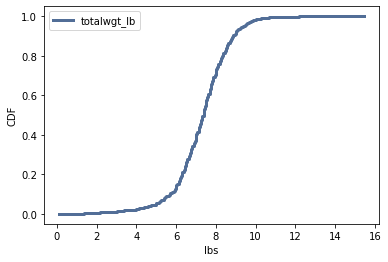

<Figure size 576x432 with 0 Axes>

In [16]:
# First, we need to import the pregnancy table and filter it for live births, first children and other,
#like we did last week.

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord !=1]

# For exploration, we'll take a look at the cdf of the live births.

cdf_live = thinkstats2.Cdf(live.totalwgt_lb, label = 'totalwgt_lb')
thinkplot.Cdf(cdf_live)
thinkplot.Show(xlabel='lbs', ylabel ='CDF')

In [17]:
# According to my Mom, I was about 8.5 lbs.  From the looks of the graph, I'm on the border of needing to apologize.  
# We'll use the thinkstats2 Cdf functions to find exactly where that probability falls.

thinkstats2.Cdf.Prob(cdf_live, 8.5)

0.8406727152024784

In [18]:
# I was in the 84th percentile of live births.  
# I'm the middle of 5 children, so lets see where I rank with the "other" group.

cdf_others = thinkstats2.Cdf(others.totalwgt_lb, label = 'totalwgt_lb')
thinkstats2.Cdf.Prob(cdf_others, 8.5)

0.8235294117647058

In [19]:
# This shows I was in the 82nd percentile of non-firstborn children.

# Exercise 4-2

In [20]:
# First, we'll import the numpy library to give us the random function.  
# We'll use it to give us an array of 1000 random numbers.

import numpy
rand_array = numpy.random.random(size = 1000)
rand_PMF = thinkstats2.Pmf(rand_array, label = 'random_PDF')
rand_CDF = thinkstats2.Cdf(rand_array, label = 'random_CDF')

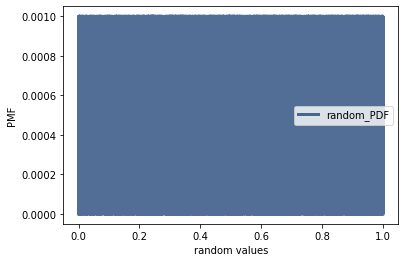

<Figure size 576x432 with 0 Axes>

In [21]:
thinkplot.Pmfs([rand_PMF])
thinkplot.Show(xlabel='random values', ylabel='PMF')

In [22]:
# This PDF shows that the probability for each of the thousand values that occured in our random sample was 1 in a thousand.
# This is one way of showing that the random function was uniformly distributes.

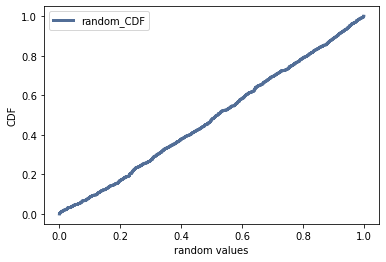

<Figure size 576x432 with 0 Axes>

In [23]:
thinkplot.Cdf(rand_CDF)
thinkplot.Show(xlabel='random values', ylabel='CDF')

In [24]:
# This CDF shows a straight line accumulated probability from zero to one.  
# Straight lines in a CDF indicate a uniform distribution.